#Import statements

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words


#Get & Load the data

In [1]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2024-04-22 06:55:09--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.1s    

2024-04-22 06:55:09 (3.18 MB/s) - ‘sentiment_train’ saved [447555/447555]



Read the data

In [3]:
train_df = pd.read_csv('sentiment_train',delimiter='\t')
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
pd.set_option('max_colwidth',800)
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


Read first 5 positive reviews

In [5]:
train_df[train_df['sentiment']==1].head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


Read 5 first negatives reviews

In [6]:
train_df[train_df['sentiment']==0].head()

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


#Exploratory Analysis on the text data (EDA) & Text Preprocessing

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


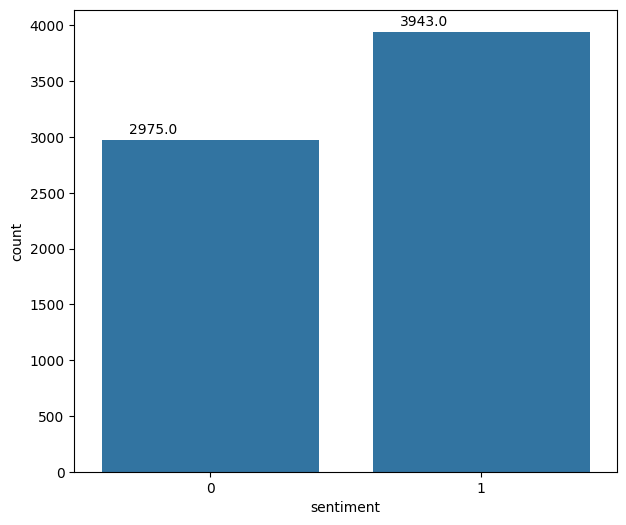

In [9]:
plt.figure(figsize=(7,6))

ax = sns.countplot(x='sentiment',data=train_df)
# Annotation
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

<ipython-input-15-7f94157e10f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=train_df, palette=custom_palette)


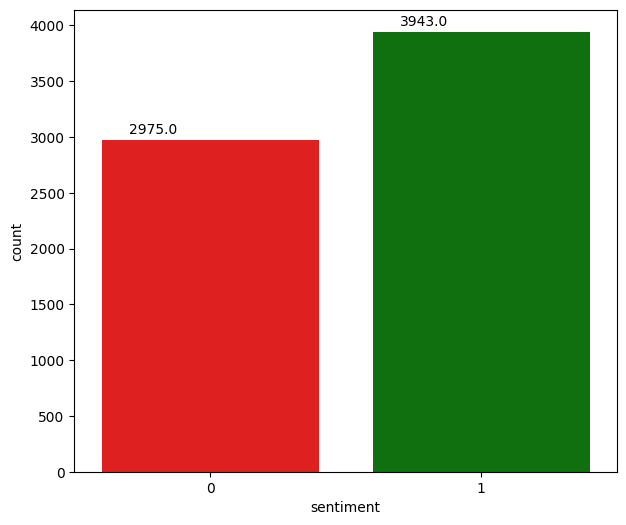

In [15]:

# Define your custom color palette for each sentiment category
custom_palette = {'1': 'green',  '0': 'red'}

plt.figure(figsize=(7, 6))
ax = sns.countplot(x='sentiment', data=train_df, palette=custom_palette)

# Annotation
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.1, p.get_height() + 50))

plt.show()


##Preprocessing

In [17]:
cv = CountVectorizer()
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

Total length of vocabulory is 2132, examples are ['00' '007' '10' '10pm' '12']


The code snippet is used to perform text vectorization using scikit-learn's `CountVectorizer` for feature extraction from text data. Here's a breakdown of each step:

1. **CountVectorizer Initialization**:
   ```python
   cv = CountVectorizer()
   ```
   Here, we initialize a `CountVectorizer` object named `cv`. `CountVectorizer` is used to convert a collection of text documents into a matrix of token counts.

2. **Fitting to Text Data**:
   ```python
   feature_vector = cv.fit(train_df['text'])
   ```
   The `fit()` method of `CountVectorizer` is used to learn the vocabulary dictionary of the training data (`train_df['text']`). This process identifies unique tokens (words) in the text data and assigns a unique index to each token.

3. **Accessing Extracted Features**:
   ```python
   features = cv.get_feature_names_out()
   ```
   After fitting the `CountVectorizer` to the text data, we can retrieve the feature names (tokens) learned from the training data using the `get_feature_names_out()` method. This method returns a list of all the unique tokens (words) identified during the fitting process.

4. **Output Information**:
   ```python
   print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")
   ```
   Finally, this code prints the total length of the vocabulary (number of unique tokens) identified from the training data and displays the first five examples of these features (tokens).

In summary, the purpose of using this code is to preprocess text data (`train_df['text']`), identify unique tokens (words) using `CountVectorizer`, and extract the learned vocabulary as a list of feature names (`features`). This vocabulary can then be used for further text processing or as input to machine learning models for tasks like text classification, sentiment analysis.

In [18]:
train_df_features = cv.transform(train_df['text'])

The line of code `train_df_features = cv.transform(train_df['text'])` is used to transform the raw text data (`train_df['text']`) into a feature matrix based on the vocabulary learned by `CountVectorizer` (`cv`):

1. **`cv.transform(train_df['text'])`**:
   The `transform()` method of `CountVectorizer` takes the input text data (`train_df['text']`) and converts it into a feature matrix. This matrix represents the token counts for each document (text sample) in the dataset.

2. **Feature Matrix**:
   The output of `cv.transform(train_df['text'])` is a sparse matrix where each row corresponds to a document (text sample) in `train_df['text']`, and each column corresponds to a unique token (word) in the vocabulary learned by `CountVectorizer`.

3. **Sparse Matrix Representation**:
   The resulting matrix `train_df_features` is a sparse matrix representation of the text data. It efficiently stores only the nonzero elements (token counts) and their indices, which is useful for handling large datasets with a large number of unique tokens.

4. **Usage in Machine Learning**:
   The feature matrix (`train_df_features`) obtained from `cv.transform()` can be used as input to machine learning algorithms for tasks such as text classification, sentiment analysis, or clustering. Each document's feature vector represents the frequency of each token (word) in the vocabulary within that document.

So, `train_df_features = cv.transform(train_df['text'])` transforms the raw text data into a numerical feature matrix suitable for machine learning tasks, where each row corresponds to a document and each column corresponds to a token in the learned vocabulary. This preprocessing step prepares the text data for subsequent modeling or analysis.

In [19]:
train_df_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [20]:
train_df_features.getnnz()

65398

The method `train_df_features.getnnz()` is used to get the count of non-zero entries in the sparse matrix `train_df_features`. Here's what this function does and why it's useful:

1. **Sparse Matrix Representation**:
   `train_df_features` is a sparse matrix obtained from the `CountVectorizer` transformation of text data. Sparse matrices are efficient for storing large matrices where most entries are zero.

2. **Non-Zero Entries**:
   The `getnnz()` method returns the count of non-zero entries in the sparse matrix `train_df_features`. This count represents the number of unique tokens (words) that appear in the text data across all documents after applying the `CountVectorizer`.

3. **Usefulness**:
   - **Vocabulary Size**: The number of non-zero entries (`train_df_features.getnnz()`) corresponds to the size of the vocabulary learned from the text data. Each non-zero entry represents a unique token (word) in the vocabulary.
   
   - **Feature Dimensionality**: In machine learning tasks, the number of non-zero entries (`train_df_features.getnnz()`) also represents the dimensionality of the feature space used to represent the text data.

4. **Example**:
   If `train_df_features.getnnz()` returns a value of `5000`, it indicates that there are 5000 unique tokens (words) in the vocabulary learned from the text data, and each document in the dataset is represented by a feature vector of length 5000 based on these tokens.


In [21]:
train_df_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

The method `train_df_features.todense()` is used to convert a sparse matrix `train_df_features` into a dense matrix representation. Here's what this function does and why it's useful:

1. **Sparse to Dense Conversion**:
   `train_df_features` is initially a sparse matrix obtained from the `CountVectorizer` transformation of text data. Sparse matrices are efficient for large datasets where most entries are zero. The `todense()` method converts this sparse representation into a dense matrix.

2. **Dense Matrix Representation**:
   In a dense matrix:
   - Each row corresponds to a document or sample in the dataset.
   - Each column corresponds to a feature (word/token) in the vocabulary learned from the text data.
   - The matrix elements represent the count of each feature (word/token) in the respective document.

3. **Usefulness**:
   - **Easier Data Manipulation**: Dense matrices are more intuitive for data manipulation and analysis in some contexts because they resemble traditional tabular data structures.
   
   - **Computational Overhead**: However, dense matrices can be memory-intensive, especially for large datasets, as they allocate memory for every entry in the matrix.

4. **Example**:
   If `train_df_features` is a sparse matrix with dimensions `(n_samples, vocab_size)`, calling `train_df_features.todense()` will return a dense matrix with dimensions `(n_samples, vocab_size)`, where each element represents the count of a specific word/token in a particular document.


In [22]:
train_df2 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df2.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This code transforms the sparse matrix `train_df_features` obtained from `CountVectorizer` into a dense DataFrame `train_df2` using `todense()`. This dense DataFrame represents the original text data with each word/token as a feature column.

Here's a breakdown of the code and its purpose:

1. **`train_df_features.todense()`**:
   - This method converts the sparse matrix `train_df_features` into a dense matrix representation.
   - The resulting dense matrix contains the word/token counts for each document (row) in the original dataset.

2. **`pd.DataFrame(train_df_features.todense(), columns=features)`**:
   - `train_df_features.todense()` produces a dense matrix where each row corresponds to a document and each column corresponds to a word/token feature.
   - `pd.DataFrame()` converts this dense matrix into a pandas DataFrame.
   - `columns=features` assigns the column names of the DataFrame to the words/tokens obtained from `CountVectorizer`.

3. **Purpose**:
   - The resulting DataFrame `train_df2` allows you to work with your text data in a structured tabular format.
   - Each row in `train_df2` corresponds to a document (e.g., text sample), and each column represents a word/token.
   - The values in `train_df2` indicate the count of each word/token in the respective document.

4. **Example**:
   If `train_df_features` is a sparse matrix with dimensions `(n_samples, vocab_size)`, `train_df_features.todense()` converts it into a dense matrix of dimensions `(n_samples, vocab_size)`. The resulting DataFrame `train_df2` will have `vocab_size` columns (one for each word/token in the vocabulary) and `n_samples` rows (one for each document in the dataset).

   Each cell in `train_df2` contains the count of a specific word/token in the corresponding document, allowing you to perform further analysis or feed the data into machine learning models that require tabular input.

Overall, `train_df2` provides a convenient way to visualize and manipulate your text data in a structured DataFrame format, which can be beneficial for various data preprocessing and modeling tasks.

In [23]:
train_df2.iloc[0:2,150:158]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0


In [24]:
train_df.head(2)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [25]:
train_df2[['the', 'da','vinci','awesome','just','book']] [:2]

,the,da,vinci,awesome,just,book
0,1,1,1,1,1,1
1,1,1,1,0,0,0


##Getting & Removing low Frequency words

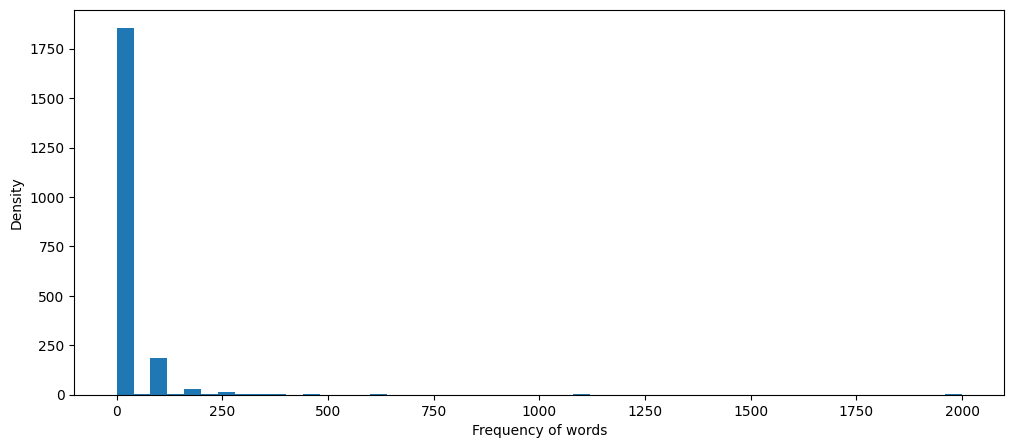

In [27]:
feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

plt.figure(figsize=(12,5))
plt.hist(feature_count_df.counts, bins=50, range=(0,2000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')
plt.show()

The provided code snippet calculates the frequency of each word/token in the `train_df_features` sparse matrix and visualizes the distribution of these word frequencies using a histogram. Here's a breakdown of the code and its purpose:

1. **`feature_counts = np.sum(train_df_features.toarray(), axis=0)`**:
   - `train_df_features.toarray()` converts the sparse matrix `train_df_features` to a dense NumPy array.
   - `np.sum(..., axis=0)` calculates the sum of word/token counts across all documents (rows) by summing along the rows (`axis=0`).
   - `feature_counts` is a NumPy array where each element corresponds to the total count of a word/token across all documents.

2. **`feature_count_df = pd.DataFrame(dict(features=features, counts=feature_counts))`**:
   - Creates a pandas DataFrame `feature_count_df` with two columns: `features` (containing word/token names) and `counts` (containing their respective total counts across all documents).
   - `features` are obtained from `features` which represents the word/token names.

3. **Visualization with Histogram**:
   - `plt.figure(figsize=(12, 5))` sets the figure size for the plot.
   - `plt.hist(feature_count_df.counts, bins=50, range=(0, 2000))` creates a histogram of word/token frequencies (`counts` column) with 50 bins and a range from 0 to 2000.
   - `plt.xlabel('Freq of words')` sets the x-axis label.
   - `plt.ylabel('Density')` sets the y-axis label.
   - `plt.show()` displays the histogram.

**Purpose**:
- The histogram visualization helps in understanding the distribution of word/token frequencies across all documents.
- The x-axis (`Freq of words`) represents the frequency (count) of words/tokens, and the y-axis (`Density`) represents the density (number of occurrences) of words/tokens at each frequency level.
- This visualization can be useful for tasks such as identifying common or rare words, assessing the distribution of vocabulary size, and deciding on appropriate preprocessing steps (e.g., removing stopwords or infrequent words) based on the observed distribution.

In [29]:
feature_count_df.head()

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1


In [28]:
feature_count_df[feature_count_df['counts']==1]

,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


The code snippet `feature_count_df[feature_count_df['counts']==1]` filters the DataFrame `feature_count_df` to select rows where the `counts` column equals `1`. This operation is useful for identifying words or tokens that appear only once (i.e., have a count of `1`) across all documents in the dataset.

##Removing Low frequency words(freq=1)

In [31]:
cv = CountVectorizer(max_features=1000)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


The code snippet provided performs the following tasks:

1. **Initialize CountVectorizer with `max_features=1000`:**
   ```python
   cv = CountVectorizer(max_features=1000)
   ```
   Here, you create a `CountVectorizer` object named `cv` with a specified parameter `max_features=1000`. This parameter limits the number of features (words or tokens) to 1000 based on their frequency in the dataset.

2. **Fit the CountVectorizer to the text data:**
   ```python
   feature_vector = cv.fit(train_df['text'])
   ```
   This step fits the `CountVectorizer` to the text data in `train_df['text']`, which learns the vocabulary and creates a document-term matrix based on the training text data.

3. **Get the list of feature names (vocabulary):**
   ```python
   features = cv.get_feature_names_out()
   ```
   After fitting the `CountVectorizer`, you retrieve the list of feature names (words or tokens) from the vocabulary learned by the `CountVectorizer`.

4. **Transform the training text data into a document-term matrix:**
   ```python
   train_df_features = cv.transform(train_df['text'])
   ```
   This line transforms the training text data (`train_df['text']`) into a document-term matrix (`train_df_features`) using the fitted `CountVectorizer`.

5. **Calculate the frequency counts of each feature (word or token):**
   ```python
   feature_counts = np.sum(train_df_features.toarray(), axis=0)
   ```
   Here, you calculate the total counts (frequencies) of each feature (word or token) across all documents in the training dataset using the document-term matrix (`train_df_features`).

6. **Create a DataFrame to display the most frequent features (words or tokens):**
   ```python
   feature_count_df = pd.DataFrame(dict(features=features, counts=feature_counts))
   feature_count_df.sort_values('counts', ascending=False).head(10)
   ```
   Finally, you create a DataFrame `feature_count_df` that contains the feature names (`features`) and their corresponding frequency counts (`counts`). The DataFrame is sorted in descending order based on the counts to display the top 10 most frequent features (words or tokens) in the training dataset.

##REmoving Stop Words From the Data

In [35]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words


In [36]:
my_stop_words = my_stop_words.union(['harry','potter','code','vinci','mountain','movie','movies','da'])

In [40]:
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

# my_stop_words = my_stop_words.union(['harry','potter','code','vinci','mountain','movie','movies','da'])

# cv = CountVectorizer(max_features=1000, stop_words = my_stop_words)
# feature_vector = cv.fit(train_df['text'])

# features = cv.get_feature_names_out()
# print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

# train_df_features = cv.transform(train_df['text'])

# feature_counts = np.sum(train_df_features.toarray(), axis=0)
# feature_count_df = pd.DataFrame(dict(features=features,
#                                      counts = feature_counts))

# feature_count_df.sort_values('counts',ascending=False).head(10)

In [39]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

# Add custom stop words to the existing set
custom_stop_words = my_stop_words.union(['harry', 'potter', 'code', 'vinci', 'mountain', 'movie', 'movies', 'da'])

# Convert the set of custom stop words to a list
custom_stop_words_list = list(custom_stop_words)

# Initialize CountVectorizer with custom stop words list
cv = CountVectorizer(max_features=1000, stop_words=custom_stop_words_list)

# Fit CountVectorizer to the text data
feature_vector = cv.fit(train_df['text'])

# Get the list of feature names (vocabulary)
features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

# Transform the training text data into a document-term matrix
train_df_features = cv.transform(train_df['text'])

# Calculate the frequency counts of each feature (word or token)
feature_counts = np.sum(train_df_features.toarray(), axis=0)

# Create a DataFrame to display the most frequent features (words or tokens)
feature_count_df = pd.DataFrame(dict(features=features, counts=feature_counts))
feature_count_df_sorted = feature_count_df.sort_values('counts', ascending=False).head(10)
print(feature_count_df_sorted)


Total length of vocabulary is 1000, examples are ['00' '10' '17' '33' '6th']
       features  counts
73    brokeback    2000
408        love    1624
39      awesome    1127
436     mission    1094
341  impossible    1093
390        like     974
745       sucks     602
743      sucked     600
297        hate     578
652      really     374


##Stemming & Lemmatization

In [41]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [ word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop

In [42]:
cv = CountVectorizer(max_features=1000, analyzer=stem_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['10' '17' '33' '6th' 'abl']


,features,counts
108,code,1984
144,da,1982
915,vinci,1982
80,brokeback,1930
440,mountain,1930
556,potter,1916
299,harri,1916
409,love,1837
797,suck,1378
922,wa,1142


Distribution of words across sentiments

In [43]:
train_df3 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df3['sentiment'] = train_df['sentiment']

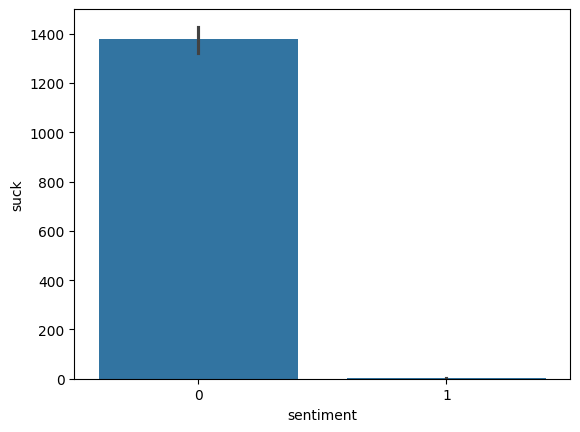

In [44]:
sns.barplot(x='sentiment',y='suck',data=train_df3, estimator=sum)
plt.show()

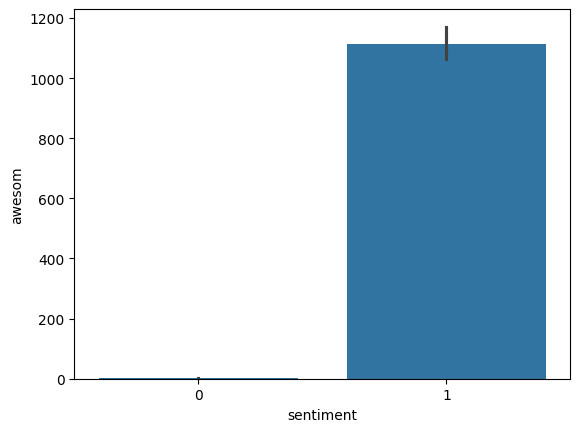

In [45]:
sns.barplot(x='sentiment',y='awesom',data=train_df3, estimator=sum)
plt.show()

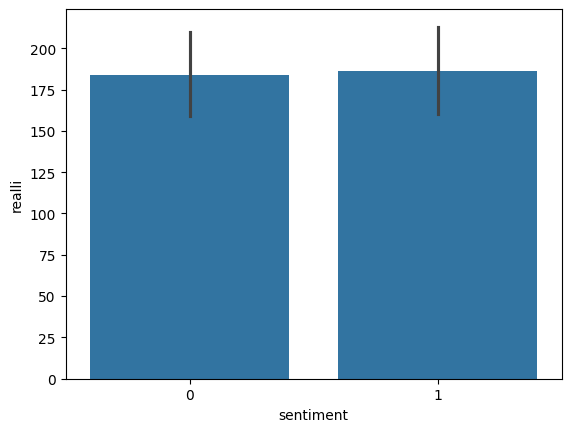

In [46]:
sns.barplot(x='sentiment',y='realli',data=train_df3, estimator=sum)
plt.show()

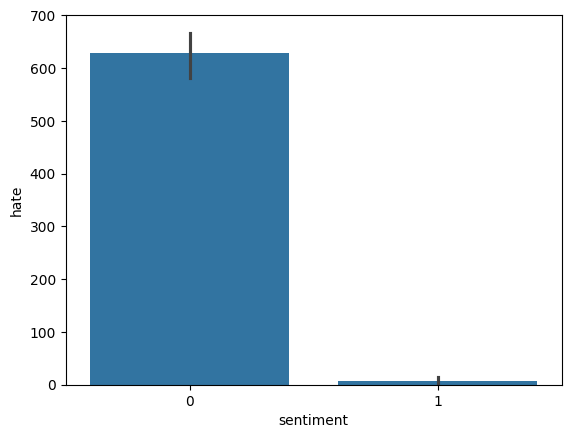

In [47]:
sns.barplot(x='sentiment',y='hate',data=train_df3, estimator=sum)
plt.show()

#Modeling

## Naive Bayes Model

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

In [49]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X_train,y_train)

BernoulliNB()

In [50]:
y_pred = bernoulli.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       873
           1       0.97      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



<Axes: >

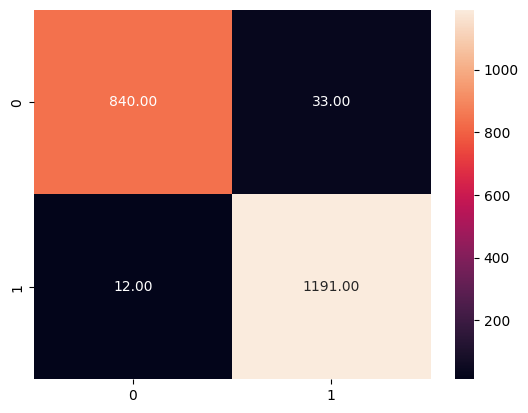

In [53]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')

## GaussianNB with on TF-IDF vectorizer

TF-IDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=stem_words, max_features=1000)
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

In [55]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(),y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



###Using n-grams

In [57]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()

def get_stemmed_tokens(document):
  all_tokens = [word for word in nltk.tokenize.word_tokenize(document)]
  clean_text = []

  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
      clean_text.append(each_token)
  stem_token = [stemmer.stem(t) for t in clean_text]
  return stem_token

In [59]:

import nltk
nltk.download('punkt')

tfidf = TfidfVectorizer(tokenizer=get_stemmed_tokens, max_features=700, stop_words=list(my_stop_words), ngram_range=(1,2))
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sin

In [60]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(),y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



<Axes: >

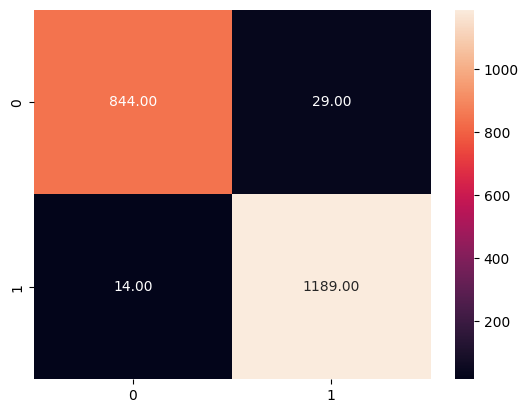

In [61]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')